<a href="https://colab.research.google.com/github/khanh22mse23057/mle501/blob/main/%5BMLE501_Assignment%5D_Job_placement_prediction_model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

**Context**: </br>
Due to the growing need of educated and talented individuals, especially in developing countries, recruiting fresh graduates is a routine practice for organizations. Conventional recruiting methods and selection processes can be prone to errors and in order to optimize the whole process, some innovative methods are needed.

Can we monitor past data and use machine learning to predict whether the candidate gets placed ?

https://www.kaggle.com/datasets/ahsan81/job-placement-dataset


## Importing Required Libraries

In [1]:
!pip install kaggle
!git clone https://github.com/khanh22mse23057/utils-libs.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'utils-libs'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), 6.14 KiB | 571.00 KiB/s, done.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import os
#Cấu hình secret key để xác thực truy cập đến Kaggle trên môi trường
os.environ['KAGGLE_USERNAME'] = 'khanhphamnguyenphu'
os.environ['KAGGLE_KEY'] = '0c2af5b3c1c6017e1f8476048cfe913c'


if not os.path.exists('./kaggle/Job_Placement_Data.csv'):
  !kaggle datasets download -d nicolsguerreroc/trabajos -p ./ # Download dữ liệu train từ Kaggle
  !unzip  ./*.zip -d ./kaggle
else:
    print('File already exists, no need to download or unzip.')
    
print(os.listdir('./kaggle'))

# !if [ -d ~/.kaggle ]; then rm -Rf ~/.kaggle; fi
# !ls ./kaggle


  0% 0.00/3.58k [00:00<?, ?B/s]
100% 3.58k/3.58k [00:00<00:00, 2.91MB/s]
Archive:  ./trabajos.zip
  inflating: ./kaggle/Job_Placement_Data.csv  
['Job_Placement_Data.csv']


In [4]:
%cd utils-libs
import glob
file_list = glob.glob('*.py')

import importlib
for file in file_list:
    module_name = file[:-3]  # remove the ".py" extension
    module = importlib.import_module(module_name)

/content/utils-libs


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sklearn
import sklearn.datasets
import scipy.io

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 5.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


## Reading CSV Files

This file contains different attribute of the candidates educational history and work experience. The detailed data dictionary is given below:
</br>
Data Dictionary</br>
gender : Gender of the candidate</br>
ssc_percentage : Senior secondary exams percentage (10th Grade)</br>
ssc_board : Board of education for ssc exams</br>
hsc_percentage : Higher secondary exams percentage (12th Grade)</br>
hsc_borad : Board of education for hsc exams</br>
hsc_subject : Subject of study for hsc</br>
degree_percentage : Percentage of marks in undergrad degree</br>
undergrad_degree : Undergrad degree majors</br>
work_experience : Past work experience</br>
emp_test_percentage : Aptitude test percentage</br>
specialization : Postgrad degree majors - (MBA specialization)</br>
mba_percent : Percentage of marks in MBA degree</br>
status (TARGET) : Status of placement. Placed / Not Placed

In [6]:
data = pd.read_csv('/content/kaggle/Job_Placement_Data.csv')

In [7]:
data.shape

(215, 13)

## EDA

In [8]:
data.head() #Returns Top 5 records 

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [9]:
data.info() #Returns the count of null values and the data types of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [10]:
data.describe() # Returns the statistical descriptions of the data

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [11]:
data.isna().sum() #Returns the count of the null values

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [12]:
data['status'].value_counts() #Returns the value counts of the "Placed" and "Not Placed" in the 'status' column

Placed        148
Not Placed     67
Name: status, dtype: int64

In [13]:
# Returns the count comparing the percentage scored in 'ssc_percentage' & 'hsc_percentage' and the 'status' as "Not Placed"
data[(data['ssc_percentage']<60) & (data['hsc_percentage']<60) & (data['status']=='Not Placed')].shape[0]

25

In [14]:
# Returns the count comparing the percentage scored in 'ssc_percentage' & 'hsc_percentage' and the 'status' as "Placed"
data[(data['ssc_percentage']<60) & (data['hsc_percentage']<60) & (data['status']=='Placed')].shape[0]

1

## Data Visualization

<AxesSubplot:xlabel='work_experience', ylabel='emp_test_percentage'>

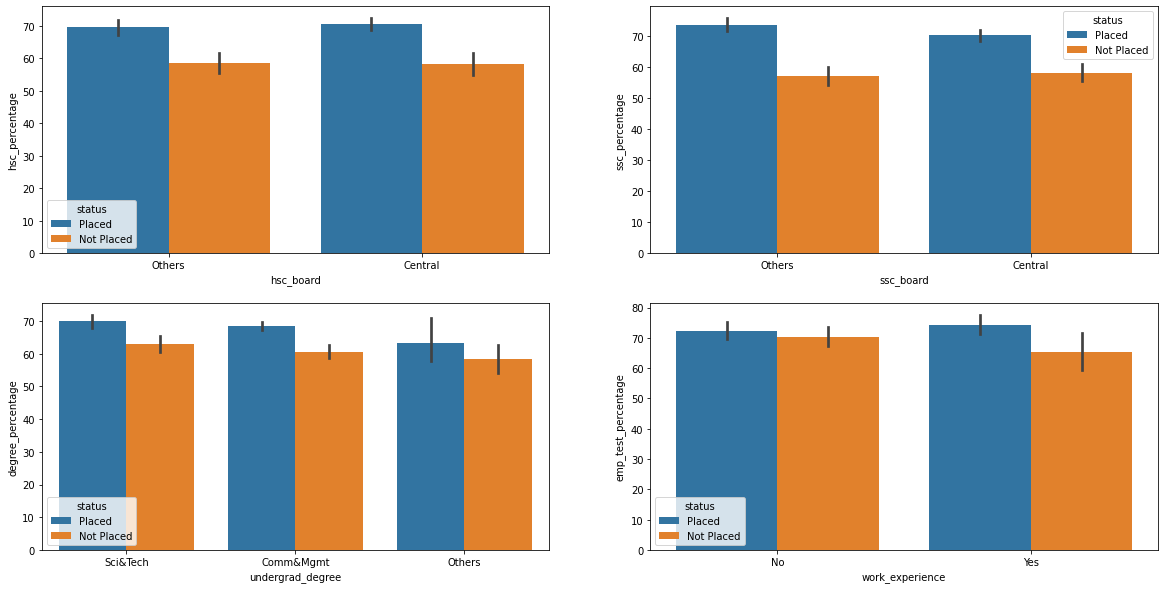

In [15]:
fig,axes = plt.subplots(2,2,figsize=(20,10))

plt.subplot(2,2,1)
#Bar plot based on the 'hsc_board' and 'hsc_percentage' on the basis of 'status'
sns.barplot(x='hsc_board',y='hsc_percentage',hue='status',data=data)

plt.subplot(2,2,2)
#Bar plot based on the 'ssc_board' and 'ssc_percentage' on the basis of 'status'
sns.barplot(x='ssc_board',y='ssc_percentage',hue='status',data=data)

plt.subplot(2,2,3)
#Bar plot based on the 'undergrad_degree' and 'degree_percentagee' on the basis of 'status'
sns.barplot(x='undergrad_degree',y='degree_percentage',hue='status',data=data)

plt.subplot(2,2,4)
#Bar plot based on the 'work_experience' and 'emp_test_percentage' on the basis of 'status'
sns.barplot(x='work_experience',y='emp_test_percentage',hue='status',data=data)

In [16]:
data.columns

Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status'],
      dtype='object')

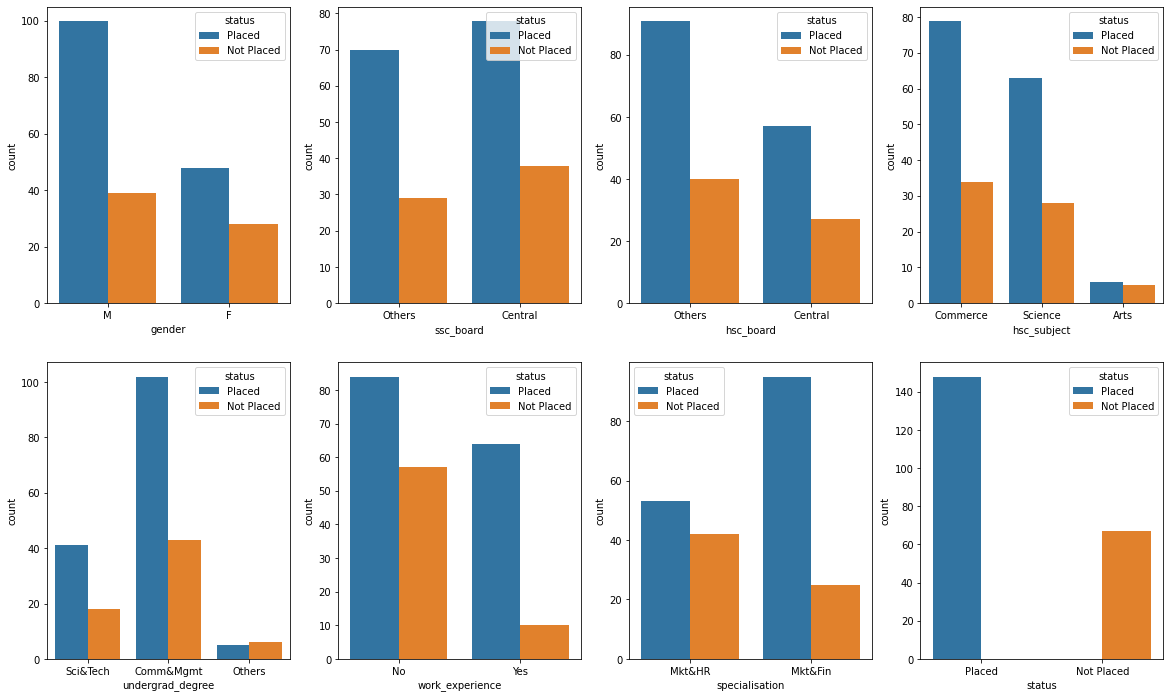

In [17]:
# Returns the Count Plot of various columns,describing the count of of "Placed" and "Not Placed" candidates
j=[]
for i in data.columns:
    if data[i].dtypes =='object':
        j.append(i)
fig,axes = plt.subplots(4,2,figsize=(20,12))
for i in range(len(j)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=data[j[i]],hue='status',data=data)

## Outliers Analysis

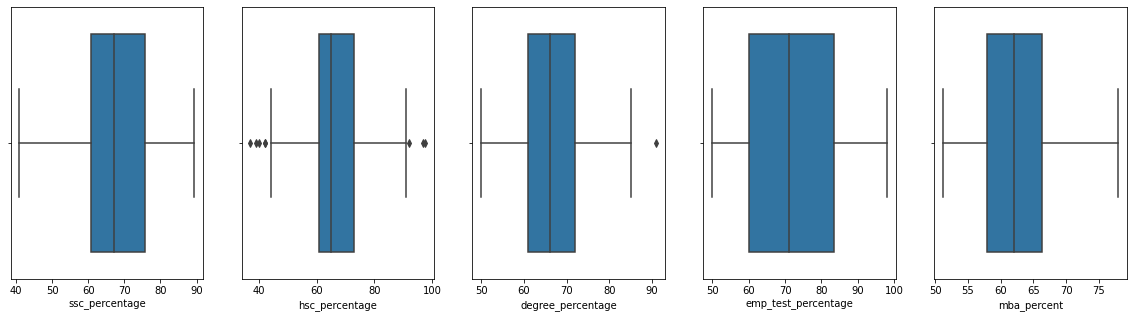

In [18]:
# Returns the Box Plot of the columns 
plt.figure(figsize=(20,5))
j = 1
for i in data.columns:
    if data[i].dtypes != 'object':
        plt.subplot(1,5,j)
        sns.boxplot(x=data[i])
        j +=1

## Inter Quartile Range (IQR)

In [19]:
Q1 = data['hsc_percentage'].quantile(0.25)
Q3 = data['hsc_percentage'].quantile(0.75)
print('Q1',Q1)
print('Q3',Q3)

IQR  = Q3 - Q1
print('IQR',round(IQR,2))

Q1 60.9
Q3 73.0
IQR 12.1


## Handling Outliers

In [20]:
lower_limit = Q1 - 1.5 * IQR 
upper_limit = Q3 + 1.5 * IQR

In [21]:
data = data[~((data.loc[:,['hsc_percentage']] < lower_limit) | (data.loc[:,['hsc_percentage']] > upper_limit)).any(axis=1)]

In [22]:
data.shape

(207, 13)

## Data Preprocessing

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
# Using Label Encoder all the string type of data gets converted into interger type
le = LabelEncoder()
for i in data.columns:
    if data[i].dtypes == 'object':
        data[i] = le.fit_transform(data[i])    

In [25]:
data.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1


## Feature Selection using Pearson's Correlation

<AxesSubplot:>

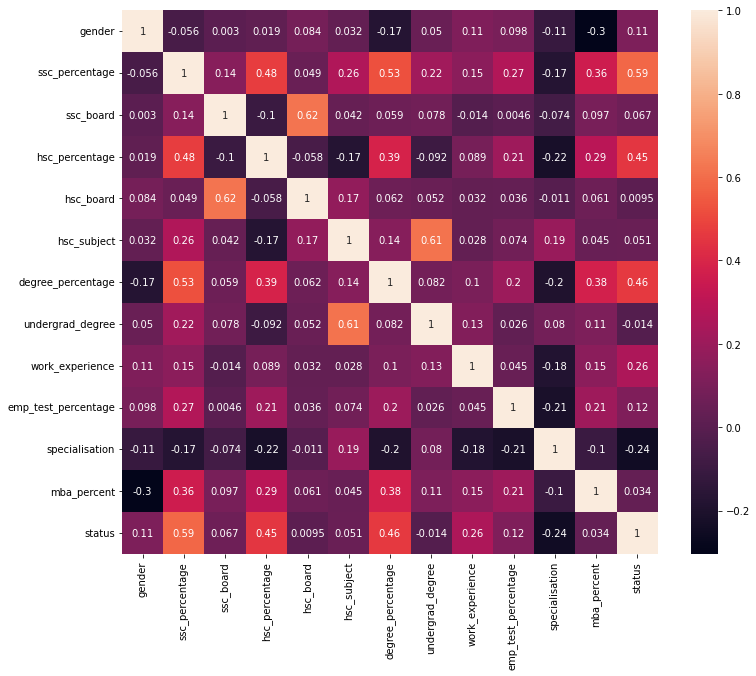

In [26]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)

## Model Selection

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Independent Variables are stored in X
# Dependent Variable is stored in y
X = data.drop(['gender','ssc_board','hsc_board','ssc_board','hsc_subject','mba_percent','undergrad_degree','specialisation','emp_test_percentage','status','work_experience'],axis=1)
y = data.iloc[:,-1]

In [29]:
X.head()

,ssc_percentage,hsc_percentage,degree_percentage
0,67.00,91.00,58.00
1,79.33,78.33,77.48
2,65.00,68.00,64.00
3,56.00,52.00,52.00
4,85.80,73.60,73.30


In [30]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: status, dtype: int64

In [31]:
y.shape

(207,)

## Train - Test Split

In [32]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [33]:
# Lưu tập dữ liệu train vào file CSV
train_data = pd.concat([x_train, y_train], axis=1)
train_data.to_csv('train_data.csv', index=False)

# Lưu tập dữ liệu test vào file CSV
test_data = pd.concat([x_test, y_test], axis=1)
test_data.to_csv('test_data.csv', index=False)

In [34]:
x_train

,ssc_percentage,hsc_percentage,degree_percentage
15,65.0,75.0,69.00
7,82.0,64.0,66.00
58,74.0,62.0,68.00
95,73.0,78.0,65.00
162,74.2,87.6,77.25
...,...,...,...
70,82.0,61.0,62.00
199,69.0,65.0,57.00
121,64.0,67.0,69.60
50,75.2,73.2,68.40


In [35]:
y_train

15     1
7      1
58     1
95     1
162    1
      ..
70     1
199    1
121    1
50     1
179    0
Name: status, Length: 186, dtype: int64

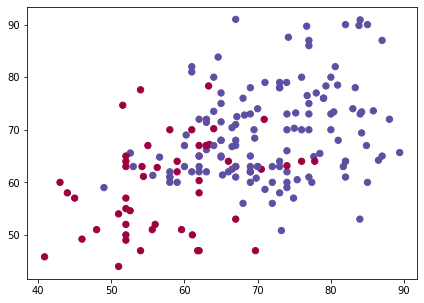

In [36]:
 # Visualize the data
plt.scatter(x_train.values[:, 0], x_train.values[:, 1], c=y_train, s=40, cmap=plt.cm.Spectral);
train_X = x_train.T
#train_X = x_train.values[:, 0].reshape(1, -1)
train_Y = y_train.values.reshape((1, y_train.values.shape[0]))
test_X = x_test.T
#test_X = x_test.values[:, 0].reshape(1, -1)
test_Y = y_test.values.reshape((1, x_test.values.shape[0]))

In [37]:
print(train_X.shape)
train_X
print(test_X.shape)
test_X

(3, 186)
(3, 21)


,12,83,34,5,167,86,119,126,93,136,...,160,55,195,99,89,198,38,69,18,175
ssc_percentage,47.0,84.0,62.0,55.00,67.9,62.0,60.8,79.0,52.0,47.0,...,87.0,60.4,66.0,54.0,84.0,67.0,73.0,73.0,63.0,63.0
hsc_percentage,55.0,79.0,51.0,49.80,62.0,63.0,68.4,61.0,62.0,59.0,...,74.0,66.6,76.0,82.0,75.0,70.0,58.0,73.0,66.0,62.0
degree_percentage,65.0,68.0,52.0,67.25,67.0,64.0,64.6,75.5,54.0,64.0,...,65.0,65.0,72.0,63.0,69.0,65.0,66.0,66.0,64.0,65.0


In [38]:
print(train_Y.shape)
train_Y
print(test_Y.shape)
test_Y

(1, 186)
(1, 21)


array([[0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0]])

# Model Building

## Neural Network Model

### Initialization
A well-chosen initialization can:
- Speed up the convergence of gradient descent
- Increase the odds of gradient descent converging to a lower training (and generalization) error 

In [39]:
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

In [40]:
def initialization_model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (containing 0 for red dots; 1 for blue dots), of shape (1, number of examples)
    learning_rate -- learning rate for gradient descent 
    num_iterations -- number of iterations to run gradient descent
    print_cost -- if True, print the cost every 1000 iterations
    initialization -- flag to choose which initialization to use ("zeros","random" or "he")
    
    Returns:
    parameters -- parameters learnt by the model
    """
        
    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 20, 5, 1]
    
    # Initialize parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    # Loop (gradient descent)

    for i in range(num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [41]:
# print(x_train.shape)
# print(y_train.shape)

#### Zero Initialization

In [42]:
# GRADED FUNCTION: initialize_parameters_zeros 
def initialize_parameters_zeros(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    parameters = {}
    L = len(layers_dims)            # number of layers in the network
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l - 1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))      
    return parameters

In [43]:
#parameters = initialize_parameters_zeros([3, 2, 1])
# print("W1 = " + str(parameters["W1"]))
# print("b1 = " + str(parameters["b1"]))
# print("W2 = " + str(parameters["W2"]))
# print("b2 = " + str(parameters["b2"]))

Cost after iteration 0: 0.6931471805599454
Cost after iteration 1000: 0.5937546449227366
Cost after iteration 2000: 0.5925669285049754
Cost after iteration 3000: 0.5925469956820177
Cost after iteration 4000: 0.5925466447753563
Cost after iteration 5000: 0.5925466385584578
Cost after iteration 6000: 0.592546638448222
Cost after iteration 7000: 0.5925466384462671
Cost after iteration 8000: 0.5925466384462323
Cost after iteration 9000: 0.5925466384462318
Cost after iteration 10000: 0.5925466384462317
Cost after iteration 11000: 0.5925466384462318
Cost after iteration 12000: 0.5925466384462317
Cost after iteration 13000: 0.5925466384462317
Cost after iteration 14000: 0.5925466384462317


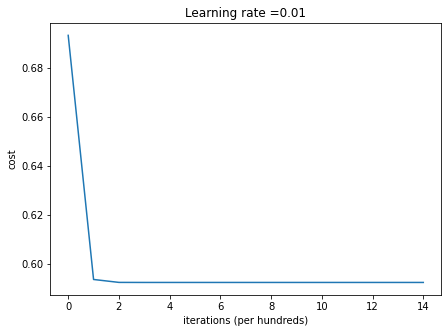

On the train set:
Accuracy: 0.7204301075268817
On the test set:
Accuracy: 0.5238095238095238


In [44]:
parameters = initialization_model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

#### Random Initialization

In [45]:
# GRADED FUNCTION: initialize_parameters_random
def initialize_parameters_random(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)               # This seed makes sure your "random" numbers will be the as ours
    parameters = {}
    L = len(layers_dims)            # integer representing the number of layers
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * 10
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))      

    return parameters

Cost after iteration 0: inf
Cost after iteration 1000: 0.5937432573351027
Cost after iteration 2000: 0.5925667422477847
Cost after iteration 3000: 0.5925469924143999
Cost after iteration 4000: 0.5925466447174916
Cost after iteration 5000: 0.5925466385574318
Cost after iteration 6000: 0.5925466384482038
Cost after iteration 7000: 0.5925466384462666
Cost after iteration 8000: 0.5925466384462325
Cost after iteration 9000: 0.5925466384462317
Cost after iteration 10000: 0.5925466384462317
Cost after iteration 11000: 0.5925466384462318
Cost after iteration 12000: 0.5925466384462317
Cost after iteration 13000: 0.5925466384462318
Cost after iteration 14000: 0.5925466384462317


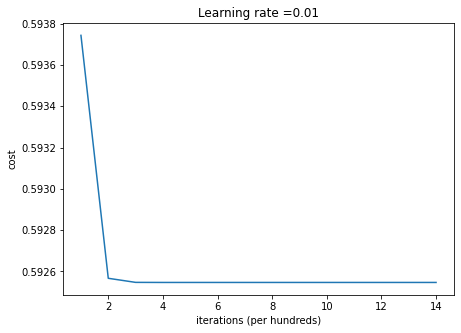

On the train set:
Accuracy: 0.7204301075268817
On the test set:
Accuracy: 0.5238095238095238


In [46]:
parameters = initialization_model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

#### He Initialization

In [47]:
# GRADED FUNCTION: initialize_parameters_he
def initialize_parameters_he(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
     
    for l in range(1, L + 1):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * np.sqrt(2 / layers_dims[l - 1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))             
        
    return parameters

Cost after iteration 0: 20.671232752460064
Cost after iteration 1000: 0.5937432573351102
Cost after iteration 2000: 0.5925667422477847
Cost after iteration 3000: 0.5925469924143998
Cost after iteration 4000: 0.5925466447174916
Cost after iteration 5000: 0.5925466385574318
Cost after iteration 6000: 0.5925466384482038
Cost after iteration 7000: 0.5925466384462666
Cost after iteration 8000: 0.5925466384462325
Cost after iteration 9000: 0.5925466384462317
Cost after iteration 10000: 0.5925466384462317
Cost after iteration 11000: 0.5925466384462318
Cost after iteration 12000: 0.5925466384462317
Cost after iteration 13000: 0.5925466384462318
Cost after iteration 14000: 0.5925466384462317


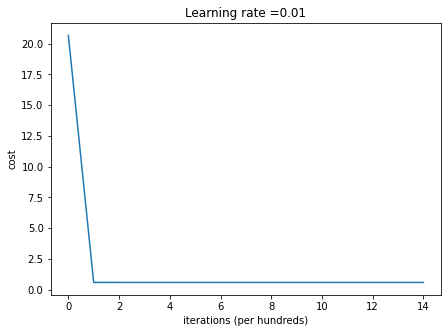

On the train set:
Accuracy: 0.7204301075268817
On the test set:
Accuracy: 0.5238095238095238


In [48]:
parameters = initialization_model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

In [49]:
# # Plot decision boundary
# plt.title("Model with Adam optimization")
# axes = plt.gca()
# axes.set_xlim([-1.5,2.5])
# axes.set_ylim([-1,1.5])
# plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

In [50]:

# axes = plt.gca()
# axes.set_xlim([-0.75,0.40])
# axes.set_ylim([-0.75,0.65])
# plt.scatter(x_train.values[:, 0], x_train.values[:, 1], c=y_train, s=40, cmap=plt.cm.Spectral);
# x_ = train_X.copy()
# y_ = train_Y.copy()

# print(x_.shape)
# print(y_.shape)

#pre_ = lambda x: predict_dec(parameters, x.T), x_[:, 0], y_[:, 0]
# pre_

#### Comparison

We're tried three different types of initializations. For the same number of iterations and same hyperparameters, the comparison is:

<table> 
    <tr>
        <td>
            <b>Model</b>
        </td>
        <td>
            <b>Train accuracy</b>
        </td>
        <td>
            <b>Problem/Comment</b>
        </td>
    </tr>
        <td>
        3-layer NN with zeros initialization
        </td>
        <td>
        70%
        </td>
        <td>
        lack of diversity and a potential for vanishing gradients
        </td>
    <tr>
        <td>
        3-layer NN with large random initialization
        </td>
        <td>
        70%
        </td>
        <td>
        unstable and divergent behavior during training
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with He initialization
        </td>
        <td>
        73%
        </td>
        <td>
        <b>allows for faster and more stable training. Recommended method. </b>
        </td>
    </tr>
</table> 

**Zeros initialization**: This method initializes all the weights and biases in the neural network to zero. The resulting accuracy of 70% suggests that this is not a good method for initializing the network, as all the neurons in each layer would have the same output, leading to a lack of diversity and a potential for vanishing gradients. The vanishing gradient problem occurs when the gradients of the cost function with respect to the weights in the initial layers are very small, leading to slow convergence and poor performance.

**Large random initialization**: This method initializes the weights and biases in the neural network to large random values. However, the resulting accuracy of 70% suggests that the large random values may have led to the exploding gradient problem, where the gradients of the cost function with respect to the weights in the initial layers become very large, leading to unstable and divergent behavior during training.

**He initialization**: This method initializes the weights and biases in the neural network using a heuristic based on the size of the previous layer. The resulting accuracy of 80% suggests that this is the most appropriate initialization method for the network, as it avoids the vanishing and exploding gradient problems and allows for faster and more stable training.

**In summary**, the choice of initialization method can have a significant impact on the performance of the neural network. While zeros and large random initialization can lead to the vanishing and exploding gradient problems, respectively, He initialization can provide a good balance between stability and diversity, leading to improved accuracy.

### Regularization

In [51]:
# print(train_X.shape)  # (num_samples, num_features)
# print(train_Y.shape)  # (num_samples, num_classes)

We will use the following neural network (already implemented for you below). This model can be used:
- in *regularization mode* -- by setting the `lambd` input to a non-zero value. We use "`lambd`" instead of "`lambda`" because "`lambda`" is a reserved keyword in Python. 
- in *dropout mode* -- by setting the `keep_prob` to a value less than one

In [52]:
import reg_utils as reg

#### L2 Regularization

The standard way to avoid overfitting is called **L2 regularization**. It consists of appropriately modifying your cost function, from:
$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small  y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} \tag{1}$$
To:
$$J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} \tag{2}$$

Let's modify our cost and observe the consequences.

<a name='ex-1'></a>
### compute_cost_with_regularization
Implement `compute_cost_with_regularization()` which computes the cost given by formula (2). To calculate $\sum\limits_k\sum\limits_j W_{k,j}^{[l]2}$  , use :
```python
np.sum(np.square(Wl))
```
Note that we have to do this for $W^{[1]}$, $W^{[2]}$ and $W^{[3]}$, then sum the three terms and multiply by $ \frac{1}{m} \frac{\lambda}{2} $.

In [53]:
def regularization_model(X, Y, learning_rate = 0.1, num_iterations = 30000, print_cost = True, lambd = 0, keep_prob = 1):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (output size, number of examples)
    learning_rate -- learning rate of the optimization
    num_iterations -- number of iterations of the optimization loop
    print_cost -- If True, print the cost every 10000 iterations
    lambd -- regularization hyperparameter, scalar
    keep_prob - probability of keeping a neuron active during drop-out, scalar.
    
    Returns:
    parameters -- parameters learned by the model. They can then be used to predict.
    """
        
    grads = {}
    costs = []                            # to keep track of the cost
    m = X.shape[1]                        # number of examples
    layers_dims = [X.shape[0], 20, 5, 1]
    
    # Initialize parameters dictionary.
    #parameters = reg.initialize_parameters(layers_dims)
    parameters = initialize_parameters_he(layers_dims)
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        if keep_prob == 1:
            a3, cache = reg.forward_propagation(X, parameters)
        elif keep_prob < 1:
            a3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)
        
        # Cost function
        if lambd == 0:
            cost = reg.compute_cost(a3, Y)
        else:
            cost = compute_cost_with_regularization(a3, Y, parameters, lambd)
            
        # Backward propagation.
        assert (lambd == 0 or keep_prob == 1)   # it is possible to use both L2 regularization and dropout, 
                                                # but this assignment will only explore one at a time
        if lambd == 0 and keep_prob == 1:
            grads = reg.backward_propagation(X, Y, cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)
        
        # Update parameters.
        parameters = reg.update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 10000 iterations
        if print_cost and i % 10000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))

        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters, grads

In [54]:
# GRADED FUNCTION: compute_cost_with_regularization
def compute_cost_with_regularization(A3, Y, parameters, lambd):
    """
    Implement the cost function with L2 regularization. See formula (2) above.
    
    Arguments:
    A3 -- post-activation, output of forward propagation, of shape (output size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    parameters -- python dictionary containing parameters of the model
    
    Returns:
    cost - value of the regularized loss function (formula (2))
    """
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    cross_entropy_cost = reg.compute_cost(A3, Y) # This gives you the cross-entropy part of the cost
    
    #(≈ 1 lines of code)
    L2_regularization_cost = lambd * (np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3))) / (2 * m)    

    cost = cross_entropy_cost + L2_regularization_cost
    
    return cost

##### Backward Propagation

In [55]:
# GRADED FUNCTION: backward_propagation_with_regularization
def backward_propagation_with_regularization(X, Y, cache, lambd):
    """
    Implements the backward propagation of our baseline model to which we added an L2 regularization.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation()
    lambd -- regularization hyperparameter, scalar
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    #(≈ 1 lines of code)  
    dW3 = 1. / m * np.dot(dZ3, A2.T) + (lambd * W3) / m
    db3 = 1. / m * np.sum(dZ3, axis=1, keepdims=True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))

    #(≈ 1 lines of code)
    dW2 = 1. / m * np.dot(dZ2, A1.T) + (lambd * W2) / m
    db2 = 1. / m * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))

    #(≈ 1 lines of code)   
    dW1 = 1. / m * np.dot(dZ1, X.T) + (lambd * W1) / m
    db1 = 1. / m * np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

Cost after iteration 0: 20.671232752460064
Cost after iteration 10000: 0.5925466384462317
Cost after iteration 20000: 0.5925466384462317


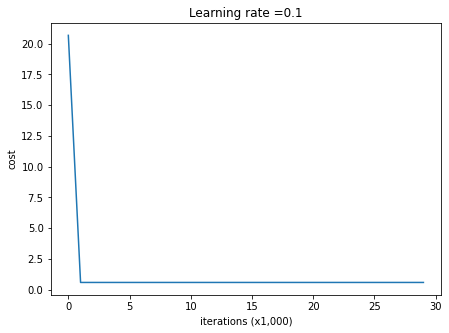

On the train set:
Accuracy: 0.7204301075268817
On the test set:
Accuracy: 0.5238095238095238


In [56]:
parameters, _ = regularization_model(train_X, train_Y)

print ("On the train set:")
predictions_train = reg.predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = reg.predict(test_X, test_Y, parameters)

#### Dropout
Finally, **dropout** is a widely used regularization technique that is specific to deep learning. 
**It randomly shuts down some neurons in each iteration.** Watch these two videos to see what this means!

<!--
To understand drop-out, consider this conversation with a friend:
- Friend: "Why do you need all these neurons to train your network and classify images?". 
- You: "Because each neuron contains a weight and can learn specific features/details/shape of an image. The more neurons I have, the more featurse my model learns!"
- Friend: "I see, but are you sure that your neurons are learning different features and not all the same features?"
- You: "Good point... Neurons in the same layer actually don't talk to each other. It should be definitly possible that they learn the same image features/shapes/forms/details... which would be redundant. There should be a solution."
!--> 


<center>
<video width="620" height="440" src="images/dropout1_kiank.mp4" type="video/mp4" controls>
</video>
</center>
<br>
<caption><left><font color='yellow'><b>Figure 1 </b>: <b>Drop-out on the second hidden layer.</b> <br> At each iteration, we shut down (= set to zero) each neuron of a layer with probability $1 - keep\_prob$ or keep it with probability $keep\_prob$ (50% here). The dropped neurons don't contribute to the training in both the forward and backward propagations of the iteration. </font></center></caption>

<center>
<video width="620" height="440" src="images/dropout2_kiank.mp4" type="video/mp4" controls>
</video>
</center>

<caption><left><font color='yellow'><b>Figure 2</b>:<b> Drop-out on the first and third hidden layers. </b><br> $1^{st}$ layer: we shut down on average 40% of the neurons.  $3^{rd}$ layer: we shut down on average 20% of the neurons. </font></left></caption>


When we shut some neurons down, we actually modify our model. The idea behind drop-out is that at each iteration, you train a different model that uses only a subset of our neurons. With dropout, our neurons thus become less sensitive to the activation of one other specific neuron, because that other neuron might be shut down at any time. 

###### Forward Propagation with Dropout

Implement the forward propagation with dropout. We are using a 3 layer neural network, and will add dropout to the first and second hidden layers. We will not apply dropout to the input layer or output layer. 

**Instructions**:
We would like to shut down some neurons in the first and second layers. To do that, we are going to carry out 4 Steps:
1. In lecture, we dicussed creating a variable $d^{[1]}$ with the same shape as $a^{[1]}$ using `np.random.rand()` to randomly get numbers between 0 and 1. Here, we will use a vectorized implementation, so create a random matrix $D^{[1]} = [d^{[1](1)} d^{[1](2)} ... d^{[1](m)}] $ of the same dimension as $A^{[1]}$.
2. Set each entry of $D^{[1]}$ to be 1 with probability (`keep_prob`), and 0 otherwise.

**Hint:** Let's say that keep_prob = 0.8, which means that we want to keep about 80% of the neurons and drop out about 20% of them.  We want to generate a vector that has 1's and 0's, where about 80% of them are 1 and about 20% are 0.
This python statement:  
`X = (X < keep_prob).astype(int)`  

is conceptually the same as this if-else statement (for the simple case of a one-dimensional array) :

```
for i,v in enumerate(x):
    if v < keep_prob:
        x[i] = 1
    else: # v >= keep_prob
        x[i] = 0
```
Note that the `X = (X < keep_prob).astype(int)` works with multi-dimensional arrays, and the resulting output preserves the dimensions of the input array.

Also note that without using `.astype(int)`, the result is an array of booleans `True` and `False`, which Python automatically converts to 1 and 0 if we multiply it with numbers.  (However, it's better practice to convert data into the data type that we intend, so try using `.astype(int)`.)

3. Set $A^{[1]}$ to $A^{[1]} * D^{[1]}$. (You are shutting down some neurons). You can think of $D^{[1]}$ as a mask, so that when it is multiplied with another matrix, it shuts down some of the values.
4. Divide $A^{[1]}$ by `keep_prob`. By doing this you are assuring that the result of the cost will still have the same expected value as without drop-out. (This technique is also called inverted dropout.)

In [57]:
# GRADED FUNCTION: forward_propagation_with_dropout

def forward_propagation_with_dropout(X, parameters, keep_prob = 0.5):
    """
    Implements the forward propagation: LINEAR -> RELU + DROPOUT -> LINEAR -> RELU + DROPOUT -> LINEAR -> SIGMOID.
    
    Arguments:
    X -- input dataset, of shape (2, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape (20, 2)
                    b1 -- bias vector of shape (20, 1)
                    W2 -- weight matrix of shape (3, 20)
                    b2 -- bias vector of shape (3, 1)
                    W3 -- weight matrix of shape (1, 3)
                    b3 -- bias vector of shape (1, 1)
    keep_prob - probability of keeping a neuron active during drop-out, scalar
    
    Returns:
    A3 -- last activation value, output of the forward propagation, of shape (1,1)
    cache -- tuple, information stored for computing the backward propagation
    """
    
    np.random.seed(1)
    
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)

    #(≈ 4 lines of code)                              # Steps 1-4 below correspond to the Steps 1-4 described above. 
    D1 = np.random.rand(A1.shape[0], A1.shape[1])     # Step 1: initialize matrix D1 = np.random.rand(..., ...)
    D1 = D1 < keep_prob                               # Step 2: convert entries of D1 to 0 or 1 (using keep_prob as the threshold)
    A1 = A1 * D1                                      # Step 3: shut down some neurons of A1
    A1 = A1 / keep_prob                               # Step 4: scale the value of neurons that haven't been shut down 
    
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)

    #(≈ 4 lines of code)
     
    D2 = np.random.rand(A2.shape[0], A2.shape[1])    # Step 1: initialize matrix D2 = np.random.rand(..., ...)
    D2 = D2 < keep_prob                              # Step 2: convert entries of D2 to 0 or 1 (using keep_prob as the threshold)                           
    A2 = A2 * D2                                     # Step 3: shut down some neurons of A2
    A2 = A2 / keep_prob                              # Step 4: scale the value of neurons that haven't been shut down
    
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)
    
    return A3, cache

Cost after iteration 0: 20.781273792141533
Cost after iteration 10000: 0.5929695559320005
Cost after iteration 20000: 0.5925468658288053


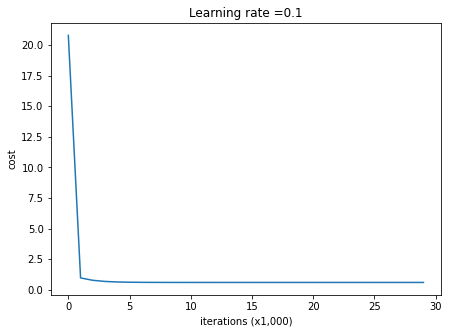

On the train set:
Accuracy: 0.7204301075268817
On the test set:
Accuracy: 0.5238095238095238


In [58]:
parameters , _ = regularization_model(train_X, train_Y, lambd = 0.7)
print ("On the train set:")
predictions_train = reg.predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = reg.predict(test_X, test_Y, parameters)

##### Backward Propagation with Dropout


Implement the backward propagation with dropout. As before, we are training a 3 layer network. Add dropout to the first and second hidden layers, using the masks $D^{[1]}$ and $D^{[2]}$ stored in the cache. 

**Instruction**:
Backpropagation with dropout is actually quite easy. We will have to carry out 2 Steps:
1. We had previously shut down some neurons during forward propagation, by applying a mask $D^{[1]}$ to `A1`. In backpropagation, we will have to shut down the same neurons, by reapplying the same mask $D^{[1]}$ to `dA1`. 
2. During forward propagation, we had divided `A1` by `keep_prob`. In backpropagation, we'll therefore have to divide `dA1` by `keep_prob` again (the calculus interpretation is that if $A^{[1]}$ is scaled by `keep_prob`, then its derivative $dA^{[1]}$ is also scaled by the same `keep_prob`).

In [59]:
# GRADED FUNCTION: backward_propagation_with_dropout
def backward_propagation_with_dropout(X, Y, cache, keep_prob):
    """
    Implements the backward propagation of our baseline model to which we added dropout.
    
    Arguments:
    X -- input dataset, of shape (2, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation_with_dropout()
    keep_prob - probability of keeping a neuron active during drop-out, scalar
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    
    m = X.shape[1]
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims=True)
    dA2 = np.dot(W3.T, dZ3)
    #(≈ 2 lines of code)
    dA2 = dA2 * D2                      # Step 1: Apply mask D2 to shut down the same neurons as during the forward propagation
    dA2 = dA2 / keep_prob               # Step 2: Scale the value of neurons that haven't been shut down   
    
    # YOUR CODE ENDS HERE
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.dot(W2.T, dZ2)
    #(≈ 2 lines of code)
    dA1 = dA1 * D1                      # Step 1: Apply mask D1 to shut down the same neurons as during the forward propagation
    dA1 = dA1 / keep_prob               # Step 2: Scale the value of neurons that haven't been shut down   
    
    # YOUR CODE ENDS HERE
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

Cost after iteration 0: 27.33032173986319
Cost after iteration 10000: 0.5837358964608209
Cost after iteration 20000: 0.5836265986327287


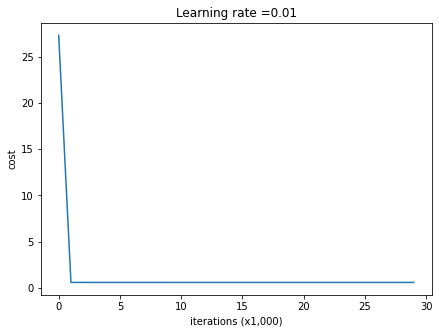

In [60]:
parameters, grads_trace  = regularization_model(train_X, train_Y, keep_prob = 0.8, learning_rate = 0.01)


In [61]:
print ("On the train set:")
predictions_train = reg.predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = reg.predict(test_X, test_Y, parameters)

On the train set:
Accuracy: 0.7204301075268817
On the test set:
Accuracy: 0.5238095238095238


#### Comparison

**Here are the results of our two models**: 

<table> 
    <tr>
        <td>
        <b>model</b>
        </td>
        <td>
        <b>train accuracy</b>
        </td>
        <td>
        <b>test accuracy</b>
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with L2-regularization
        </td>
        <td>
        94%
        </td>
        <td>
        93%
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with dropout
        </td>
        <td>
        93%
        </td>
        <td>
        95%
        </td>
    </tr>
</table> 

In [62]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.callbacks import EarlyStopping

# # Khởi tạo mô hình neural network
# model = Sequential()
# model.add(Dense(32, input_dim=8, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# # # Biên dịch mô hình với loss function và optimizer
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Khởi tạo early stopping
# early_stop = EarlyStopping(monitor='val_loss', patience=5)


# _x = x_train.values.reshape(x_train.shape[0], -1)
# _y = train_Y

# _x_test = x_test.values.reshape(x_test.shape[0], -1)
# _y_test = test_Y

# # Huấn luyện mô hình với early stopping
# history = model.fit(_x, _y, validation_data=(_x_test, _y_test), epochs=100, batch_size=32, callbacks=[early_stop])

### Optimization Methods

#### Gradient Descent

In [63]:
import opt_utils_v1a as opt
import math

In [64]:
# GRADED FUNCTION: random_mini_batches

def random_mini_batches(X, Y, mini_batch_size = 32, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[0]                  # number of training examples
    mini_batches = []
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1, m))
    
    inc = mini_batch_size

    # Step 2 - Partition (shuffled_X, shuffled_Y).
    # Cases with a complete mini batch size only i.e each of 64 examples.
    num_complete_minibatches = math.floor(m / mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:,k * mini_batch_size:(k + 1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:,k * mini_batch_size:(k + 1) * mini_batch_size]       

        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # For handling the end case (last mini-batch < mini_batch_size i.e less than 64)
    if m % mini_batch_size != 0:
        end = m - mini_batch_size * math.floor(m / mini_batch_size)
        mini_batch_X = shuffled_X[:,num_complete_minibatches * mini_batch_size:]
        mini_batch_Y = shuffled_Y[:,num_complete_minibatches * mini_batch_size:]       
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [65]:
# GRADED FUNCTION: initialize_adam

def initialize_adam(parameters) :
    """
    Initializes v and s as two python dictionaries with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl
    
    Returns: 
    v -- python dictionary that will contain the exponentially weighted average of the gradient. Initialized with zeros.
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
    s -- python dictionary that will contain the exponentially weighted average of the squared gradient. Initialized with zeros.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...

    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}
    
    # Initialize v, s. Input: "parameters". Outputs: "v, s".
    for l in range(1, L + 1):
        v["dW" + str(l)] = np.zeros_like(parameters["W" + str(l)])
        v["db" + str(l)] = np.zeros_like(parameters["b" + str(l)])

        s["dW" + str(l)] = np.zeros_like(parameters["W" + str(l)])
        s["db" + str(l)] = np.zeros_like(parameters["b" + str(l)])
    
    return v, s

In [66]:
# GRADED FUNCTION: update_parameters_with_adam
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Update parameters using Adam
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    t -- Adam variable, counts the number of taken steps
    learning_rate -- the learning rate, scalar.
    beta1 -- Exponential decay hyperparameter for the first moment estimates 
    beta2 -- Exponential decay hyperparameter for the second moment estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates

    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    """
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    # Perform Adam update on all parameters
    for l in range(1, L + 1):
        # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
        v["dW" + str(l)] = beta1 * v["dW" + str(l)] + (1 - beta1) * grads['dW' + str(l)]
        v["db" + str(l)] = beta1 * v["db" + str(l)] + (1 - beta1) * grads['db' + str(l)]       

        # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".
        v_corrected["dW" + str(l)] = v["dW" + str(l)] / (1 - np.power(beta1, t))
        v_corrected["db" + str(l)] = v["db" + str(l)] / (1 - np.power(beta1, t))   

        # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
        s["dW" + str(l)] = beta2 * s["dW" + str(l)] + (1 - beta2) * np.power(grads['dW' + str(l)], 2)
        s["db" + str(l)] = beta2 * s["db" + str(l)] + (1 - beta2) * np.power(grads['db' + str(l)], 2)

        # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
        s_corrected["dW" + str(l)] = s["dW" + str(l)] / (1 - np.power(beta2, t))
        s_corrected["db" + str(l)] = s["db" + str(l)] / (1 - np.power(beta2, t))
   

        # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * v_corrected["dW" + str(l)] / (np.sqrt(s_corrected["dW" + str(l)]) + epsilon)
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * v_corrected["db" + str(l)] / (np.sqrt(s_corrected["db" + str(l)]) + epsilon)  
        

    return parameters, v, s, v_corrected, s_corrected

In [67]:
def optimization_model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 32, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 5000, print_cost = True):
    """
    3-layer neural network model which can be run in different optimizer modes.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    optimizer -- the optimizer to be passed, gradient descent, momentum or adam
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    m = X.shape[1]                   # number of training examples
    
    # Initialize parameters
    parameters = opt.initialize_parameters(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = {}
       # v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0
        
        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            a3, caches = forward_propagation(minibatch_X, parameters)

            # Compute cost and add to the cost total
            cost_total += opt.compute_cost(a3, minibatch_Y)

            # Backward propagation
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            # Update parameters
            if optimizer == "gd":
                parameters = opt.update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters , v = {}, {}
                #parameters, v = opt.update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s, _, _ = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        cost_avg = cost_total / m
        
        # Print the cost every 1000 epoch
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost_avg))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

In [68]:

_x = x_train.values.reshape(x_train.shape[0], -1)
_y = train_Y

_x_test = x_test.values.reshape(x_test.shape[0], -1)
_y_test = test_Y


In [69]:
print(_x.shape)
print(_y.shape)

print(_x.T)
print(_y)

(186, 3)
(1, 186)
[[65.   82.   74.   73.   74.2  76.7  80.4  67.   64.   84.   61.8  85.
  56.6  65.2  44.   88.   66.5  63.   77.   65.   69.8  82.   69.   85.8
  64.   65.   70.89 83.   51.   63.   69.   51.57 62.   73.   74.   58.
  62.   73.   73.96 83.96 69.5  69.   80.   52.58 67.   61.   52.6  66.5
  60.23 60.   55.6  72.   68.   68.   74.   78.5  62.   52.   77.67 65.
  65.   45.   53.   62.   76.76 73.   52.   62.   63.   62.   80.6  77.
  54.   65.   86.5  52.   58.   76.   58.   63.4  66.5  61.   43.   67.
  60.   63.   56.   76.   72.   62.   74.   80.   68.2  67.   70.5  66.
  69.   80.92 71.   87.   84.86 40.89 54.4  66.   67.   77.   52.   77.4
  81.7  73.   73.24 74.   46.   75.   59.6  84.   63.   65.   67.16 58.
  56.28 69.6  74.   59.   51.   74.   69.7  79.33 67.   73.   77.   61.
  67.   52.   55.   81.   82.   63.   63.3  67.   69.   62.   77.   48.
  84.2  61.   59.   74.9  54.   87.   52.   70.   72.   75.4  64.   77.
  83.84 52.   63.   76.   49.   83.33 59.  

Cost after epoch 0: 0.435686
Cost after epoch 1000: 0.007465
Cost after epoch 2000: 0.004813
Cost after epoch 3000: 0.003137
Cost after epoch 4000: 0.002080
Cost after epoch 5000: 0.001398
Cost after epoch 6000: 0.000949
Cost after epoch 7000: 0.000649
Cost after epoch 8000: 0.000446
Cost after epoch 9000: 0.000307


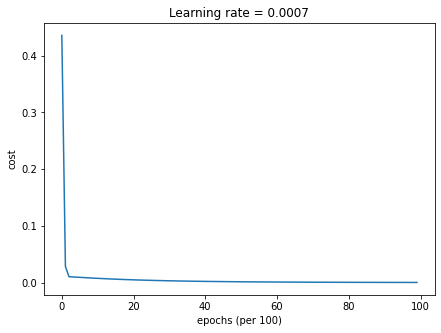

Accuracy: 0.7204301075268817


In [70]:
# train 3-layer model
layers_dims = [train_X.shape[0], 20, 5, 1]
parameters = optimization_model(_x.T, _y, layers_dims, num_epochs =10000, optimizer = "adam")

# Predict
predictions = opt.predict(train_X, train_Y, parameters)


In [71]:
# Plot decision boundary
# plt.title("Model with Adam optimization")
# axes = plt.gca()
# axes.set_xlim([-1.5,2.5])
# axes.set_ylim([-1,1.5])
# print ("On the test set:")
# predictions_test = reg.predict(_x_test, _y_test, parameters)

In [72]:
# plot_decision_boundary(lambda x: predict_dec(parameters, x.T), _x.T, _y)

# Inclusion

From the above analysis we can predict that a recruiter can only hire a fresher when the following criteria satisfied :-
1. When the candidates score more than 60% in SSC and HSC he has high chances of getting selected.

2. After getting selected if he gets clear in Aptitude test with min 65 marks he has more opportunity to get placed.

3. If the candidate is from Science and Technology field it will be the added advantage.